In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [7]:
#df_train = pd.read_csv('../../data/sample/1949_node_sample.txt',delim_whitespace=True)
df_train = pd.read_csv('train.csv')

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>


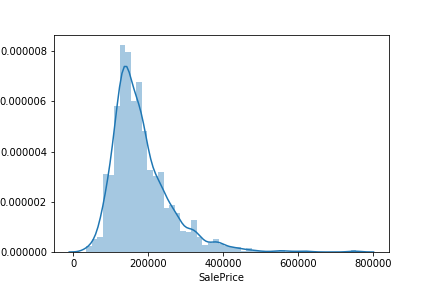

In [12]:
sns.distplot(df_train.SalePrice)

In [13]:
print("Skewness: %f" % df_train.SalePrice.skew())
print("Kurtosis: %f" % df_train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<IPython.core.display.Javascript object>


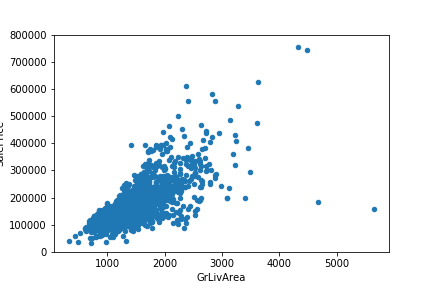

In [14]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x = var,y='SalePrice', ylim=(0,800000))

<IPython.core.display.Javascript object>


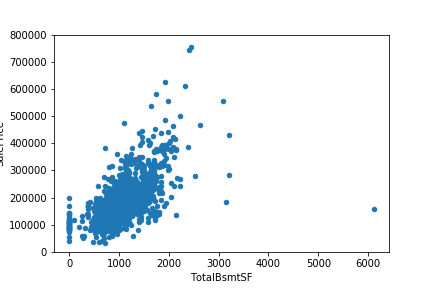

In [22]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x = var,y='SalePrice', ylim=(0,800000))

### Relationship with categorical features

<IPython.core.display.Javascript object>


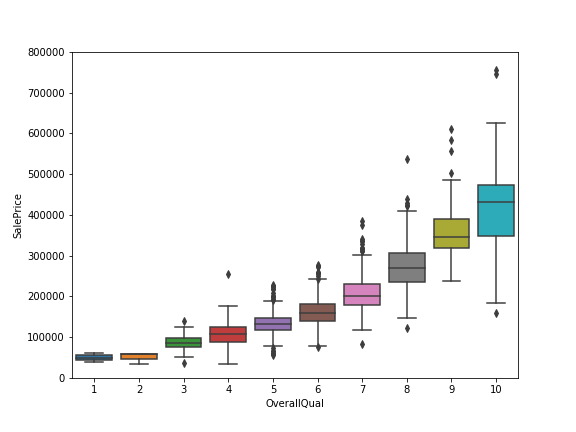

(-0.5, 9.5, 0, 800000)

In [25]:
var = 'OverallQual' #房屋装饰的程度
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="SalePrice",data = data)
fig.axis(ymin=0, ymax=800000)

In [24]:
df_train.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

<IPython.core.display.Javascript object>


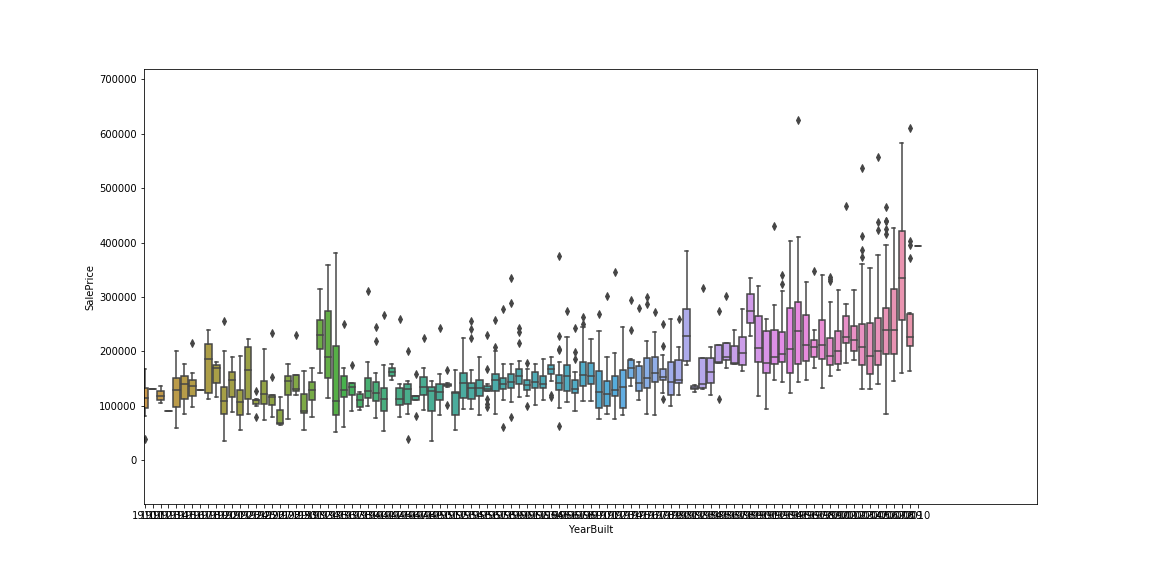

(-0.5, 111.5, 0, 800000)

In [27]:
var = 'YearBuilt' #房屋装饰的程度
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y="SalePrice",data = data)
fig.axis(ymin=0, ymax=800000)

## Correlation matrix(heapmap style)

<IPython.core.display.Javascript object>


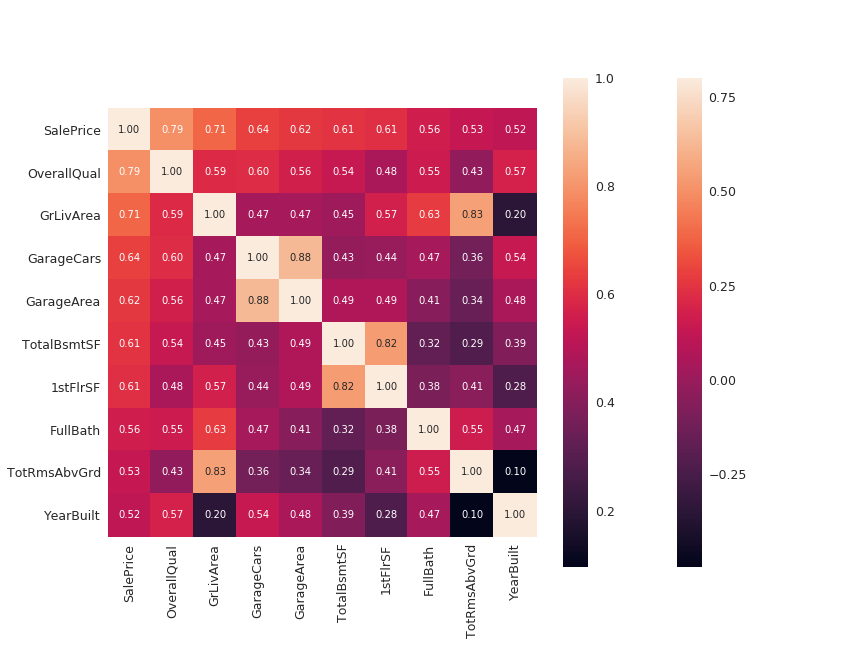

In [34]:
corrmat = df_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [51]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T) #计算的是行与行之间的相关性系数
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [53]:
cols = corrmat.nlargest(5, 'SalePrice')['SalePrice'].index
print(cols)
print(df_train[cols].values)
print(df_train[cols].values.T)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')
[[208500      7   1710      2    548]
 [181500      6   1262      2    460]
 [223500      7   1786      2    608]
 ..., 
 [266500      7   2340      1    252]
 [142125      5   1078      1    240]
 [147500      5   1256      1    276]]
[[208500 181500 223500 ..., 266500 142125 147500]
 [     7      6      7 ...,      7      5      5]
 [  1710   1262   1786 ...,   2340   1078   1256]
 [     2      2      2 ...,      1      1      1]
 [   548    460    608 ...,    252    240    276]]
